## **Chains** and **Runnables** in **LangChain**

- Chain: Chains are predefined workflows that connect a prompt and a model together to generate an output in a fixed sequence.

- Runnables : Runnables are flexible building blocks that you can combine step-by-step to create custom LLM workflows.

In [1]:
!pip install langchain #The main library to use langchain components
!pip install langchain_google_genai #It is langchain package to connect with gemini models through langchain.
!pip install langchain_classic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.3 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
gem = userdata.get('Gemini')

import os
os.environ["GOOGLE_API_KEY"] =gem
# We have setuped the environment variable for accessing gemini models

## Problem Statement

The main objective of this case study is to clearly understand and compare three different workflows in LangChain in an effective and practical way.

To achieve this, we will build a simple LLM application that takes a story as input and generates 3 to 4 meaningful questions to test comprehension and thinking ability.

This same problem will be implemented using:

- Runnable Workflow (Modern Approach) – To understand modular and flexible pipeline design using LCEL.

- LLMChain Workflow (Classic Approach) – To understand the traditional single-chain structure.

- SequentialChain Workflow (Multi-Step Classic Approach) – To understand how multiple chains can be connected in sequence.

By solving the same task using all three methods, this case study helps in clearly understanding their structure, flexibility, and real-world usability.

In [3]:
import langchain
import langchain_classic #To access chain
# langchain_classic is used to support the old chain-based APIs like LLMChain and ConversationChain. It helps old projects keep working after LangChain was divided into smaller packages like langchain_core and langchain_community.

from langchain_google_genai import GoogleGenerativeAI, ChatGoogleGenerativeAI

In [4]:
# Step 1 = Create a prompt template
from langchain_core.prompts import ChatPromptTemplate, HumanMessagePromptTemplate, SystemMessagePromptTemplate

In [5]:
cpt = ChatPromptTemplate.from_messages([SystemMessagePromptTemplate.from_template("You are having a 10 years of experience in writing and generating a story"),
                                  HumanMessagePromptTemplate.from_template("Based on this genre: {genre} generate a story")])

In [6]:
prompt = cpt.format(genre="adventure")

In [7]:
# Step 2 = Set LLM Model

In [8]:
model = ChatGoogleGenerativeAI(model = "gemini-2.5-flash-lite")

In [9]:
response = model.invoke(prompt)

In [10]:
response #story

AIMessage(content='The biting wind whipped Elara\'s auburn hair across her face, stinging her eyes, but she barely noticed. Her gaze was fixed on the jagged peaks of the Obsidian Spine, a mountain range whispered about in hushed tones, a place where legends were born and adventurers vanished. For years, the faded parchment clutched in her hand, a map passed down through her family, had been her obsession. It spoke of the Sunstone, a gem of immense power hidden within the heart of these treacherous mountains, a gem that could, according to the ancient texts, restore balance to a world slowly succumbing to a creeping, unnatural twilight.\n\nBeside her, Bram, a burly, good-natured dwarf with a beard the color of a stormy sky, grunted, adjusting the heavy pack on his shoulders. "Are ye sure about this, lass? The elders say these peaks are cursed. No one who\'s gone up has ever come back down."\n\nElara’s jaw tightened. "The world is dying, Bram. The sun grows weaker, the crops fail, and a 

In [11]:
from langchain_core.output_parsers import StrOutputParser

We use StrOutputParser from langchain_core.output_parsers to convert the model’s response into a simple plain text (string) format.

It ensures the output from LangChain is clean, structured, and easy to use in our application.

In [12]:
strp = StrOutputParser()

In [13]:
strp.parse(response.content) # Change type of the output.

'The biting wind whipped Elara\'s auburn hair across her face, stinging her eyes, but she barely noticed. Her gaze was fixed on the jagged peaks of the Obsidian Spine, a mountain range whispered about in hushed tones, a place where legends were born and adventurers vanished. For years, the faded parchment clutched in her hand, a map passed down through her family, had been her obsession. It spoke of the Sunstone, a gem of immense power hidden within the heart of these treacherous mountains, a gem that could, according to the ancient texts, restore balance to a world slowly succumbing to a creeping, unnatural twilight.\n\nBeside her, Bram, a burly, good-natured dwarf with a beard the color of a stormy sky, grunted, adjusting the heavy pack on his shoulders. "Are ye sure about this, lass? The elders say these peaks are cursed. No one who\'s gone up has ever come back down."\n\nElara’s jaw tightened. "The world is dying, Bram. The sun grows weaker, the crops fail, and a perpetual gloom ha

In [ ]:
# Create a Runnable chain

In [42]:
from langchain_core.runnables import RunnableSequence

We import RunnableSequence from langchain_core.runnables to combine multiple steps (like prompt → model → parser) into one smooth pipeline.

It helps us create a structured and flexible workflow using the modern approach of LangChain.

In [47]:
runnablechain = RunnableSequence(cpt,model,strp)

In [48]:
# Runnable supports invoke, stream and batch
runnablechain.invoke("adventure") #way 1

'The salt spray whipped across Elara’s face, stinging her eyes but doing little to dampen the thrill coursing through her veins. Her ship, the *Sea Serpent*, a sturdy vessel with sails the color of a stormy sky, sliced through the turquoise waves of the Serpent’s Embrace, a notoriously treacherous stretch of ocean rumored to be the resting place of forgotten treasures and lurking leviathans.\n\nElara, captain of the *Sea Serpent* and a legend in her own right, gripped the ship’s wheel, her knuckles white. Her crew, a motley but loyal band of hardened sailors, moved with practiced efficiency, their faces etched with a mixture of anticipation and a healthy dose of fear. They were on the hunt for the Sunstone of Aethelgard, a mythical artifact said to grant unparalleled navigational abilities, a prize that would elevate Elara’s reputation from renowned pirate to undisputed queen of the seas.\n\nTheir journey had begun weeks ago, following a tattered, ink-stained map purchased from a shado

In [50]:
runnablechain2 = cpt|model|strp #Way 2 : But it is only possible in sequentical flow

In [51]:
runnablechain2.invoke(input="adventure")

'The biting wind whipped Elara’s fiery red hair across her face, stinging her eyes. She squinted, her gaze fixed on the jagged peaks of the Serpent’s Tooth mountains, a formidable barrier rumored to guard the entrance to the Sunken City. For weeks, she’d followed whispers and fragmented maps, driven by a legend of an artifact said to hold the lost knowledge of the Ancients, a power that could heal the blight slowly consuming her homeland.\n\nHer companion, a grizzled, one-eyed dwarf named Borin, grunted beside her, his breath pluming in the frigid air. "You sure about this, lass? Those peaks ain\'t for the faint of heart. And the stories about what lies beyond..." He trailed off, his one good eye scanning the treacherous slopes.\n\nElara’s jaw tightened. “The blight is spreading, Borin. My village is dying. If the Sunken City holds the key, I have to try.” Her voice, though strained by the altitude, held a steely resolve that had seen them through countless perilous journeys.\n\nTheir 

In [14]:
# Create a Pipeline using Chain

In [15]:
from langchain_classic.chains import LLMChain , SequentialChain

# LLMChain : Create a single chain
# SequentialChain : To connect multiple chain we have SequentialChain


In [16]:
chain = LLMChain(prompt = cpt, llm=model, output_parser=strp) #Workflow

/tmp/ipython-input-2108912370.py:1: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use `RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(prompt = cpt, llm=model, output_parser=strp) #Workflow


In [17]:
out = chain.run(genre="adventure")

/tmp/ipython-input-1810845959.py:1: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain-classic 0.1.0 and will be removed in 1.0. Use `invoke` instead.
  out = chain.run(genre="adventure")


In [18]:
out

"The biting wind whipped Elara’s crimson cloak around her as she scrambled up the jagged incline. Below, the churning, grey sea gnawed at the base of the cliffs, a constant reminder of the perilous journey she’d undertaken. Her destination? The Whisperwind Isles, a place whispered about in hushed tones by seasoned sailors and dismissed as myth by most. But Elara, armed with a tattered, ancient map and an unyielding thirst for discovery, believed.\n\nHer quest was not for gold or glory, but for the Sunstone. Legend claimed it was a gem of immense power, capable of healing any ailment, and Elara’s younger sister, Lyra, lay wasting away from a creeping sickness that no physician could cure. The map, inherited from her eccentric explorer grandfather, showed a hidden cove on the largest of the Whisperwind Isles, marked with a symbol that resembled a stylized sun.\n\nDays blurred into a relentless cycle of battling storms, rationing meager supplies, and navigating by the stars. Her small, st

In [19]:
chain1 = LLMChain(prompt = cpt, llm=model, output_parser=strp,output_key="story")
#This line creates a chain that sends the prompt (cpt) to the model, formats the model’s response using strp, and saves the final output with the key "story".

- prompt = cpt → The prompt template that defines what input will be sent to the model.

- llm = model → The language model that generates the response.

- output_parser = strp → Formats or processes the model’s output (for example, converts it into a clean string).

- output_key = "story" → The key name under which the final output will be stored in the result dictionary.

In [20]:
cpt1 = ChatPromptTemplate.from_messages([SystemMessagePromptTemplate.from_template("You are an expert educator with 10+ years of experience in creating thoughtful, engaging, and analytical questions based on stories. Generate well-structured questions that test comprehension, critical thinking, inference, and creativity. Include a mix of easy, moderate, and challenging questions to deeply evaluate understanding of the story."),
                                  HumanMessagePromptTemplate.from_template("Based on the following story: {story}, generate 3 to 4 clear and meaningful questions that test understanding of the story. Include a mix of comprehension and thinking-based questions.")])

In [21]:
chain2 = LLMChain(prompt = cpt1, llm=model, output_parser=strp,output_key="questions")

In [22]:
# Chain1 and Chain2 both are independent, we want to connect this 2 chains to create complate pipline using SequentialChain

In [39]:
sc = SequentialChain(chains=[chain1,chain2],input_variables=["genre"],output_variables=["questions"])


In [ ]:
sc = SequentialChain(chains=[chain1,chain2],input_variables=["genre"],output_variables=["story","questions"]) #Return an error
#Note : If we want to get chain 1 output as well as chain 2 output it is not possible in chains , that is posssible in RUNNABLES only

In [40]:
output = sc.run(genre = "Romantic")

In [41]:
print(output)

Here are 3 to 4 questions based on the story:

1.  What is the significance of the "misplaced bookmark" and how does it serve as the catalyst for the developing relationship between Elara and Liam?
2.  Beyond their shared love for books, what other qualities or shared experiences do Elara and Liam discover that contribute to their growing connection?
3.  How does the bookshop itself act as a character or a setting that influences the unfolding romance between Elara and Liam?
4.  The story mentions Elara's heart feeling like a "bustling ballroom, filled with the music of a waltz she hadn’t realized she’d been waiting to dance." What does this metaphor reveal about Elara's internal state and her readiness for a new chapter in her life?


In [53]:
runnablechain3 = cpt|model|strp|cpt1|model|strp

In [55]:
print(runnablechain3.invoke(input="adventure"))

Here are 3 to 4 questions based on the story:

1.  What was Elara's primary motivation for seeking the Sunstone, and what evidence did she encounter that reinforced her belief in its necessity?
2.  Describe the nature of the "guardians" Elara and Borin encountered. How did their initial appearance and the subsequent challenge they presented differ from Borin's expectations?
3.  What was the true nature of the "sacrifice" the Sunstone demanded, and how did Elara's understanding and execution of this sacrifice differ from what might have been initially assumed?
4.  Beyond simply retrieving the Sunstone, what significant transformation occurred on the Serpent's Tooth as a result of Elara's actions, and how was this change symbolized?


In [57]:
#Visulize the chain (Workflow)
from IPython.display import Image, display

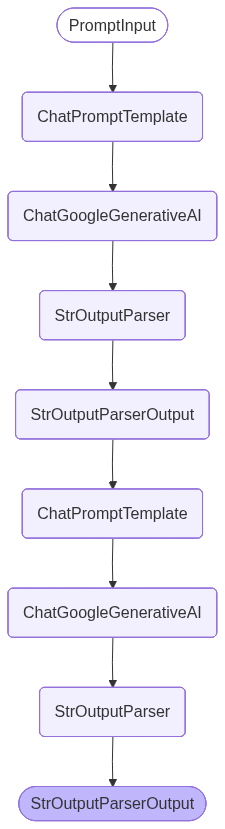

In [60]:
graph = runnablechain3.get_graph() #Runnable Workflow

display(Image(graph.draw_mermaid_png()))

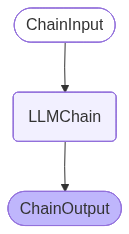

In [61]:
graph = chain2.get_graph() #LLMChain Workflow

display(Image(graph.draw_mermaid_png()))

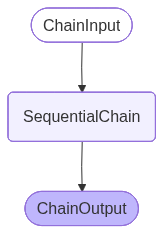

In [62]:
graph = sc.get_graph() #SequentialChain Workflow

display(Image(graph.draw_mermaid_png()))

###🔹 Difference Between Chains and Runnables in LangChain
1. Chains (Classic Approach)

- It is Older, predefined pipeline structure

- Example: LLMChain

- Fixed workflow design

- Less flexible and harder to customize

- Mainly used for backward compatibility

- Think of Chains as a fixed pipeline where steps are already defined.

2. Runnables (Modern LCEL Approach)

- New modular building blocks

- Connected using the | operator

- Highly flexible and composable

- Easier to debug, scale, and deploy

- Recommended for modern production systems

- Think of Runnables as LEGO blocks — you can connect and rearrange them easily.

#### Note:
Chains are the older fixed pipeline approach, whereas Runnables are the modern, flexible, and composable way to build LLM workflows.

-------------THANK YOU-----------------